<a href="https://colab.research.google.com/github/imrib/ImriBregman-HW/blob/main/HW5__Drone%26Bird_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today's task is to identify bird drones and other things.
We will use two datasets.
The first is drone data.
The second is bird data.
Then we will perform data preprocessing.
Then we Build and Train a CNN Classifier Model.
Finally we will present statistics of the model we created.
Is the task understood?

Absolutely, the task is clear. We'll be working with two datasets - one containing drone data and the other containing bird data. We'll perform data preprocessing, build and train a Convolutional Neural Network (CNN) classifier model using the Keras library in the Google Colab environment. Once the model is trained, we'll present statistics to evaluate its performance. Let's proceed step by step. If you have specific details about the datasets or any preferences regarding the model architecture, feel free to provide them. Otherwise, I'll make some assumptions and proceed.







In [ ]:
!pip install tensorflow
!pip install opencv-python


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def process_drone_images(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Counter to keep track of displayed images
    displayed_images = 0

    # Process all label files in the drone input folder
    for file_name in os.listdir(input_folder):
        # Check if the file is a label file (has a .txt extension)
        if file_name.endswith('.txt'):
            # Construct the full path for the label
            label_path = os.path.join(input_folder, file_name)

            # Read the YOLO format label
            with open(label_path, 'r') as file:
                lines = file.readlines()

            # Construct the full path for the corresponding image
            image_name = os.path.splitext(file_name)[0] + '.jpg'
            image_path = os.path.join(input_folder, image_name)

            # Read the image
            image = cv2.imread(image_path)

            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read the image {image_name}.")
                continue

            # Get image dimensions
            img_height, img_width, _ = image.shape

            # Process each line in the label file
            for line in lines:
                label_data = line.strip().split()

                # Extract YOLO format coordinates
                if len(label_data) != 5:
                    print(f"Error: Invalid format in label file {file_name}. Expected 5 values.")
                    continue

                class_id, x_center, y_center, width, height = map(float, label_data)

                # Convert normalized coordinates to pixel values
                x_center_pixel = int(x_center * img_width)
                y_center_pixel = int(y_center * img_height)
                width_pixel = int(width * img_width)
                height_pixel = int(height * img_height)

                # Calculate bounding box coordinates
                x1 = max(0, x_center_pixel - width_pixel // 2)
                y1 = max(0, y_center_pixel - height_pixel // 2)
                x2 = min(img_width, x_center_pixel + width_pixel // 2)
                y2 = min(img_height, y_center_pixel + height_pixel // 2)

                # Crop and resize the image
                cropped_image = image[y1:y2, x1:x2]

                # Check if the cropped image is valid
                if cropped_image.size == 0:
                    print(f"Error: Unable to crop the image {image_name}.")
                    continue

                resized_image = cv2.resize(cropped_image, (32, 32))

                # Check if the resized image is valid
                if resized_image.size == 0:
                    print(f"Error: Unable to resize the image {image_name}.")
                    continue

                # Save the cropped and resized image to the output folder
                output_image_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop_{class_id}.jpg')
                cv2.imwrite(output_image_path, resized_image)

                # Save the label file to the output folder
                output_label_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop_{class_id}.txt')
                with open(output_label_path, 'w') as label_file:
                    label_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

                # Display only the first 10 images
                if displayed_images < 10:
                    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
                    plt.axis('off')
                    plt.title(f'Image {os.path.splitext(file_name)[0]}_crop_{class_id}')
                    plt.show()
                    displayed_images += 1

                if displayed_images == 10:
                    break

            if displayed_images == 10:
                break

# Process drone data and save in /content/drive/MyDrive/drone_data_crop
process_drone_images('/content/drive/MyDrive/drone_data', '/content/drive/MyDrive/drone_data_crop')


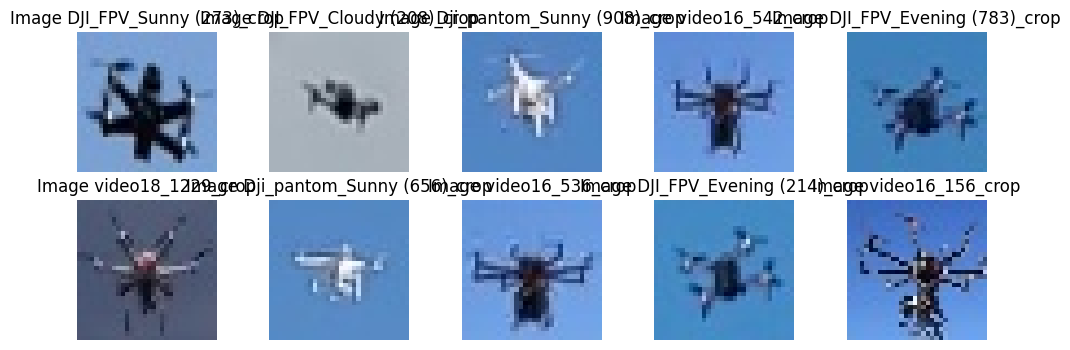

In [23]:
import os
import cv2
import matplotlib.pyplot as plt

# Set the path to the folder
output_folder = '/content/drive/MyDrive/drone_data_crop'

# Get a list of jpeg files in the folder
image_files = [file for file in os.listdir(output_folder) if file.lower().endswith(('.jpg', '.jpeg'))]

# Display the first 10 images
plt.figure(figsize=(12, 4))
for i in range(10):
    if i < len(image_files):
        file_name = image_files[i]
        img_path = os.path.join(output_folder, file_name)

        plt.subplot(2, 5, i + 1)
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Image {os.path.splitext(file_name)[0]}')

plt.show()


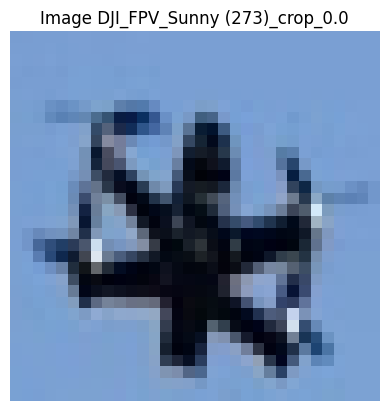

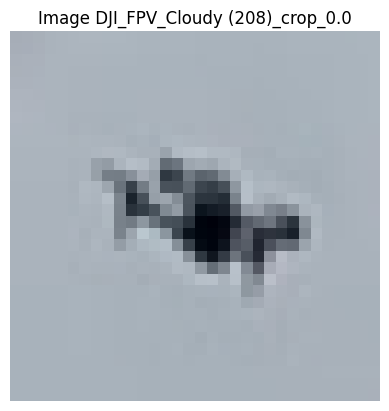

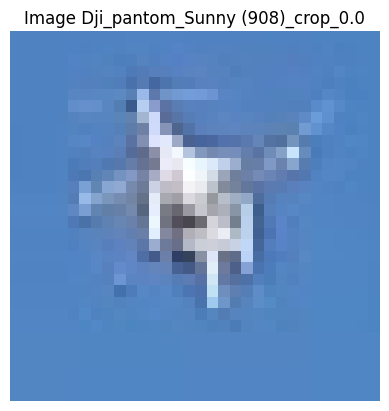

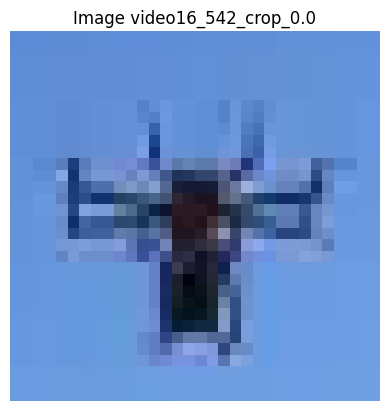

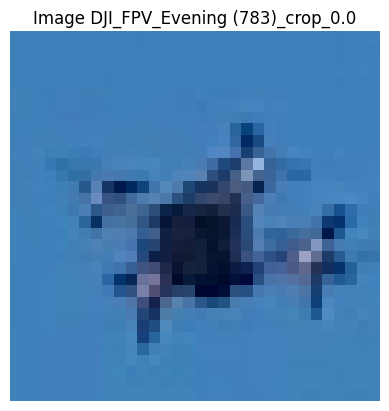

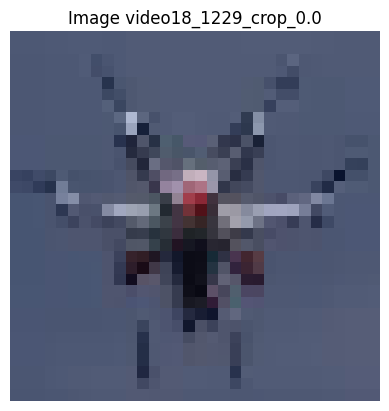

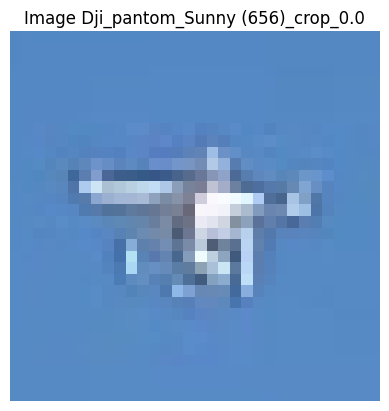

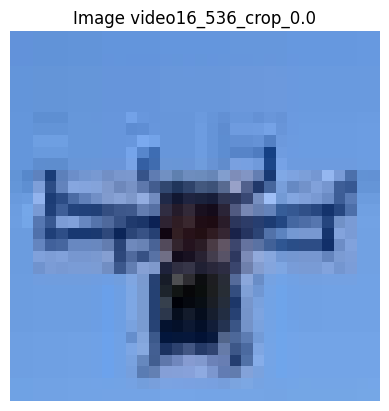

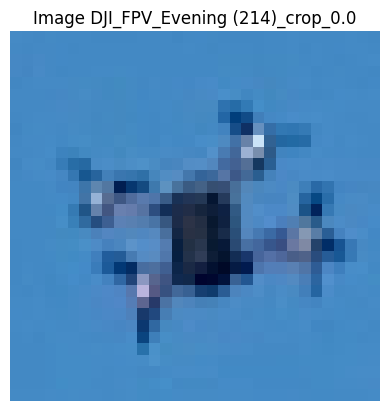

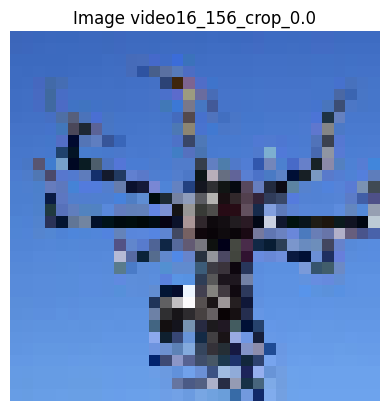

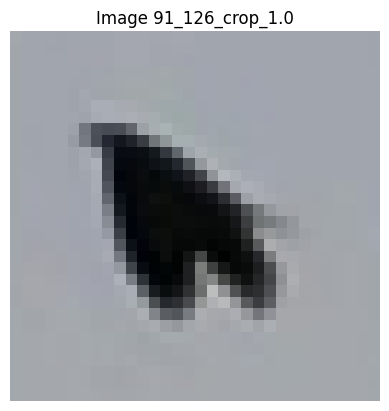

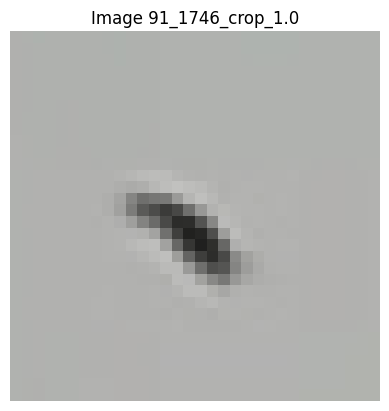

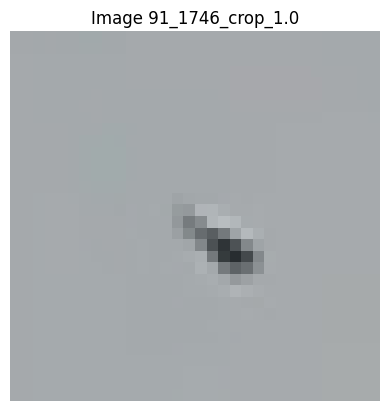

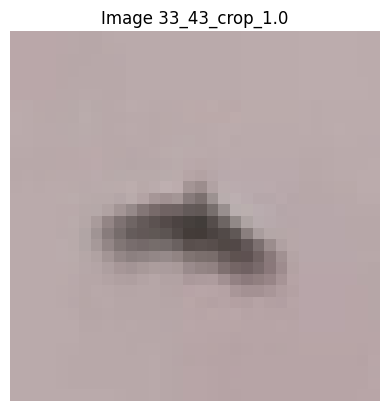

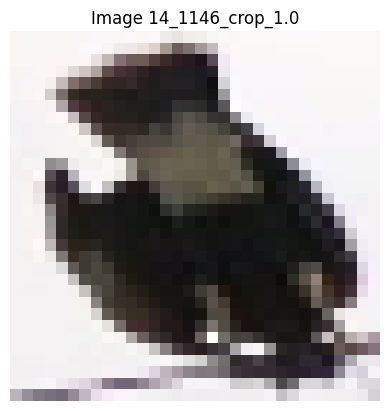

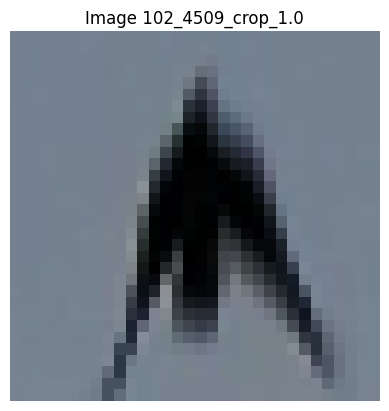

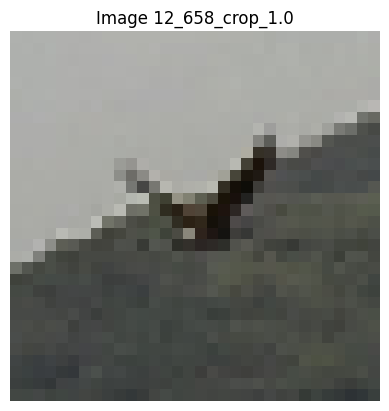

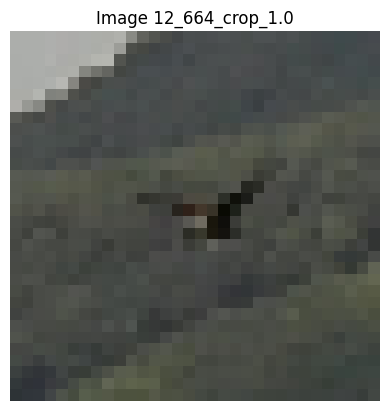

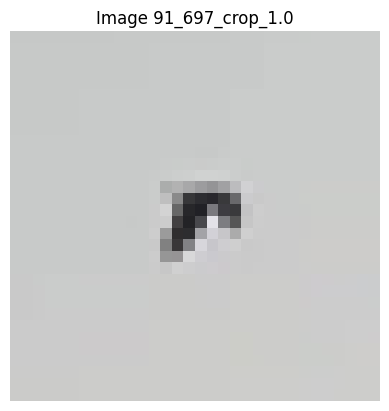

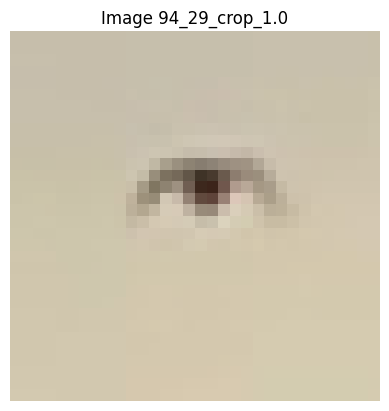

In [30]:
import os
import cv2
import matplotlib.pyplot as plt

def process_bird_images(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Counter to keep track of displayed images
    displayed_images = 0

    # Process all label files in the bird input folder
    for file_name in os.listdir(input_folder):
        # Check if the file is a label file (has a .txt extension)
        if file_name.endswith('.txt'):
            # Construct the full path for the label
            label_path = os.path.join(input_folder, file_name)

            # Read the YOLO format label
            with open(label_path, 'r') as file:
                lines = file.readlines()

            # Construct the full path for the corresponding image
            image_name = os.path.splitext(file_name)[0] + '.jpg'
            image_path = os.path.join(input_folder, image_name)

            # Read the image
            image = cv2.imread(image_path)

            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read the image {image_name}.")
                continue

            # Get image dimensions
            img_height, img_width, _ = image.shape

            # Process each line in the label file
            for line in lines:
                label_data = line.strip().split()

                # Extract YOLO format coordinates
                if len(label_data) != 5:
                    print(f"Error: Invalid format in label file {file_name}. Expected 5 values.")
                    continue

                class_id, x_center, y_center, width, height = map(float, label_data)

                # Convert normalized coordinates to pixel values
                x_center_pixel = int(x_center * img_width)
                y_center_pixel = int(y_center * img_height)
                width_pixel = int(width * img_width)
                height_pixel = int(height * img_height)

                # Calculate bounding box coordinates
                x1 = max(0, x_center_pixel - width_pixel // 2)
                y1 = max(0, y_center_pixel - height_pixel // 2)
                x2 = min(img_width, x_center_pixel + width_pixel // 2)
                y2 = min(img_height, y_center_pixel + height_pixel // 2)

                # Crop and resize the image
                cropped_image = image[y1:y2, x1:x2]

                # Check if the cropped image is valid
                if cropped_image.size == 0:
                    print(f"Error: Unable to crop the image {image_name}.")
                    continue

                resized_image = cv2.resize(cropped_image, (32, 32))

                # Check if the resized image is valid
                if resized_image.size == 0:
                    print(f"Error: Unable to resize the image {image_name}.")
                    continue

                # Save the cropped and resized image to the output folder
                output_image_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop_{class_id}.jpg')
                cv2.imwrite(output_image_path, resized_image)

                # Save the label file to the output folder
                output_label_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop_{class_id}.txt')
                with open(output_label_path, 'w') as label_file:
                    label_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

                # Display only the first 10 images
                if displayed_images < 10:
                    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
                    plt.axis('off')
                    plt.title(f'Image {os.path.splitext(file_name)[0]}_crop_{class_id}')
                    plt.show()
                    displayed_images += 1

                if displayed_images == 10:
                    break

            if displayed_images == 10:
                break

# Process bird data and save in /content/drive/MyDrive/bird_data_crop
process_bird_images('/content/drive/MyDrive/bird_data', '/content/drive/MyDrive/bird_data_crop')


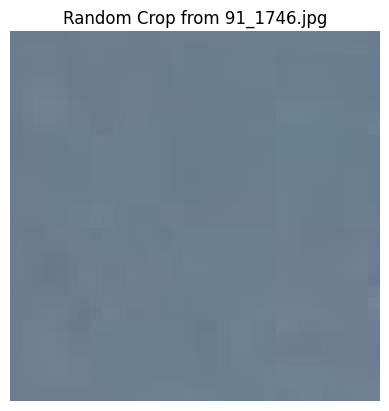

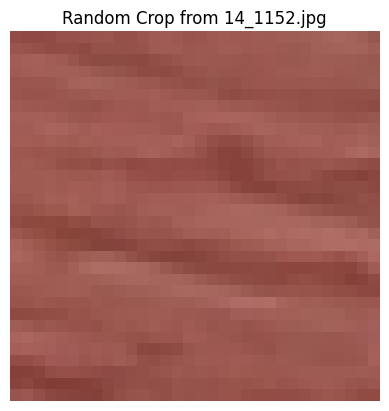

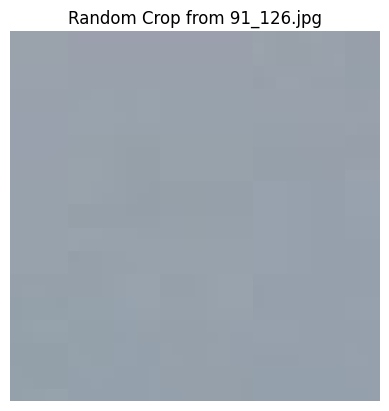

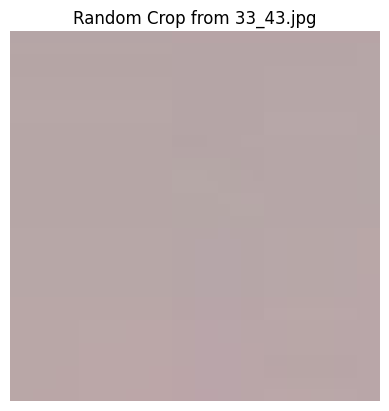

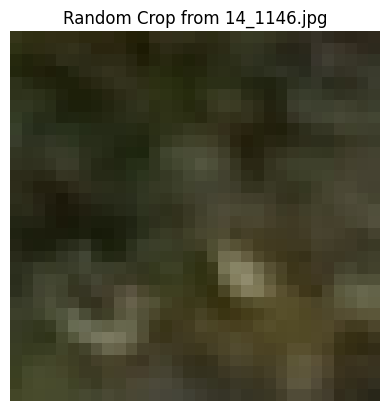

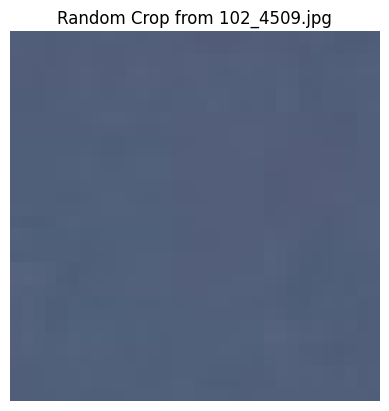

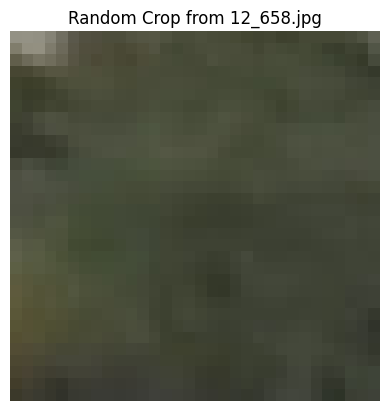

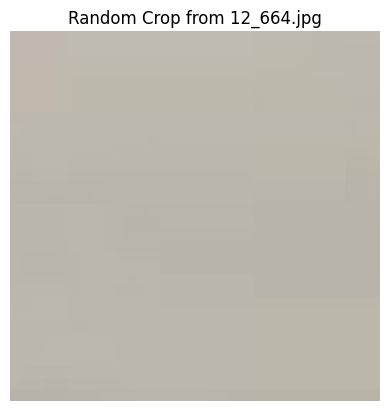

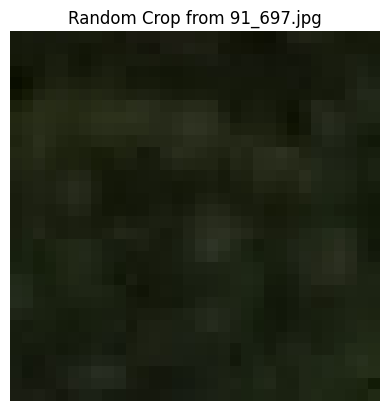

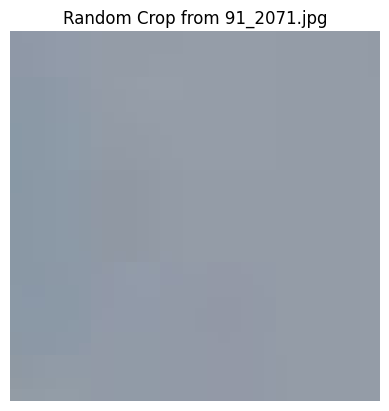

In [32]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_random_images(input_folders, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Counter to keep track of displayed images
    displayed_images = 0

    for input_folder in input_folders:
        # Process all image files in the input folder
        for file_name in os.listdir(input_folder):
            # Check if the file is a .jpg image
            if file_name.lower().endswith('.jpg'):
                # Construct the full path for the image
                image_path = os.path.join(input_folder, file_name)

                # Read the image
                image = cv2.imread(image_path)

                # Check if the image is successfully loaded
                if image is None:
                    print(f"Error: Unable to read the image {image_path}.")
                    continue

                # Get image dimensions
                img_height, img_width, _ = image.shape

                # Generate random coordinates for cropping
                x1 = np.random.randint(0, img_width - 32)
                y1 = np.random.randint(0, img_height - 32)
                x2 = x1 + 32
                y2 = y1 + 32

                # Crop the image
                cropped_image = image[y1:y2, x1:x2]

                # Check if the cropped image is valid
                if cropped_image.size == 0:
                    print(f"Error: Unable to crop the image {image_path}.")
                    continue

                # Save the cropped image to the output folder
                output_image_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop.jpg')
                cv2.imwrite(output_image_path, cropped_image)

                # Display only the first 10 images
                if displayed_images < 10:
                    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
                    plt.axis('off')
                    plt.title(f'Random Crop from {file_name}')
                    plt.show()
                    displayed_images += 1

                if displayed_images == 10:
                    break

            if displayed_images == 10:
                break

# Process random data and save in /content/drive/MyDrive/other_data_crop
process_random_images(['/content/drive/MyDrive/bird_data', '/content/drive/MyDrive/drone_data'],
                      '/content/drive/MyDrive/other_data_crop')


Write this code for all images in drone_data folders
bird_data
Finally print 10 random images

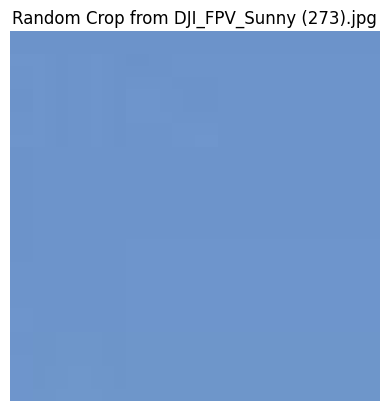

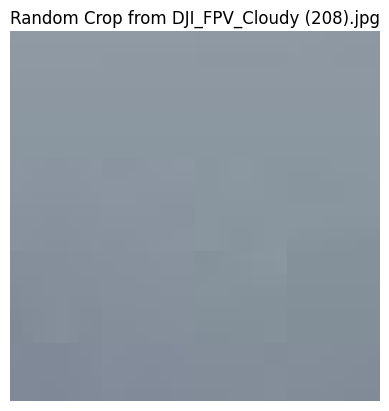

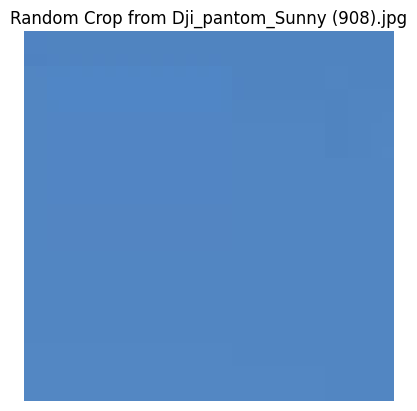

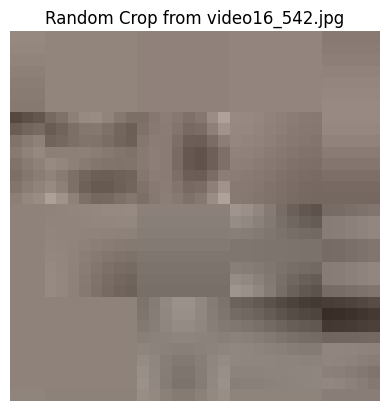

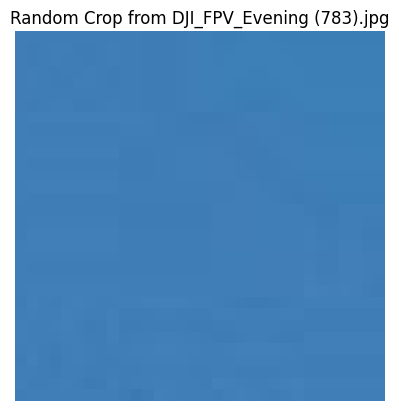

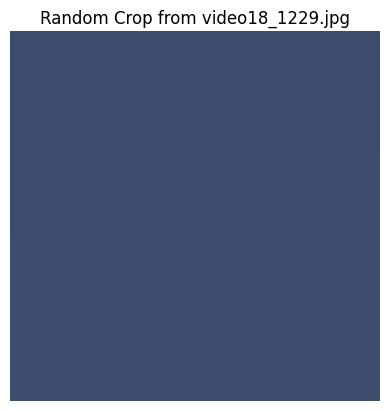

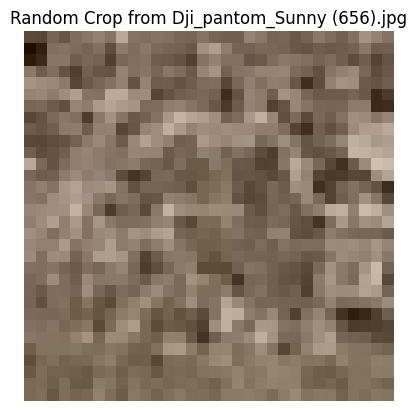

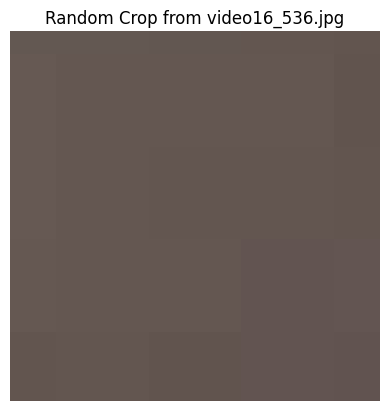

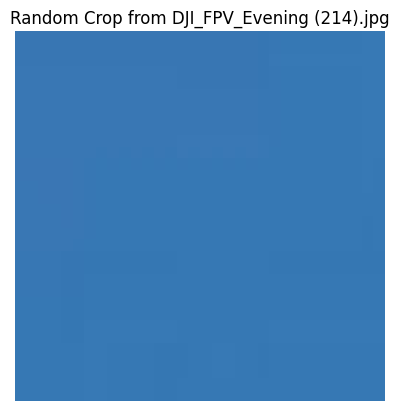

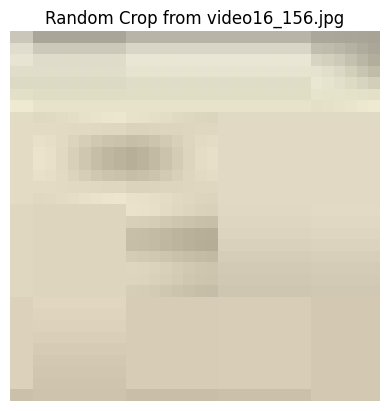

In [33]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_all_images(input_folders, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Counter to keep track of displayed images
    displayed_images = 0

    for input_folder in input_folders:
        # Process all image files in the input folder
        for file_name in os.listdir(input_folder):
            # Check if the file is a .jpg image
            if file_name.lower().endswith('.jpg'):
                # Construct the full path for the image
                image_path = os.path.join(input_folder, file_name)

                # Read the image
                image = cv2.imread(image_path)

                # Check if the image is successfully loaded
                if image is None:
                    print(f"Error: Unable to read the image {image_path}.")
                    continue

                # Get image dimensions
                img_height, img_width, _ = image.shape

                # Generate random coordinates for cropping
                x1 = np.random.randint(0, img_width - 32)
                y1 = np.random.randint(0, img_height - 32)
                x2 = x1 + 32
                y2 = y1 + 32

                # Crop the image
                cropped_image = image[y1:y2, x1:x2]

                # Check if the cropped image is valid
                if cropped_image.size == 0:
                    print(f"Error: Unable to crop the image {image_path}.")
                    continue

                # Save the cropped image to the output folder
                output_image_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop.jpg')
                cv2.imwrite(output_image_path, cropped_image)

                # Display only the first 10 images
                if displayed_images < 10:
                    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
                    plt.axis('off')
                    plt.title(f'Random Crop from {file_name}')
                    plt.show()
                    displayed_images += 1

                if displayed_images == 10:
                    break

            if displayed_images == 10:
                break

# Process all images in drone_data and bird_data and save in /content/drive/MyDrive/other_data_crop
process_all_images(['/content/drive/MyDrive/drone_data', '/content/drive/MyDrive/bird_data'],
                   '/content/drive/MyDrive/other_data_crop')


How many pictures are in /content/drive/MyDrive/other_data_crop

In [44]:
import os

def count_images_in_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Error: Folder {folder_path} not found.")
        return

    # Count the number of image files in the folder
    image_count = sum(1 for file_name in os.listdir(folder_path) if file_name.lower().endswith('.jpg'))

    return image_count

# Specify the folder path
folder_path = '/content/drive/MyDrive/drone_data_crop'

# Count the number of images in the folder
image_count = count_images_in_folder(folder_path)

print(f"There are {image_count} pictures in the folder {folder_path}.")


There are 4318 pictures in the folder /content/drive/MyDrive/drone_data_crop.


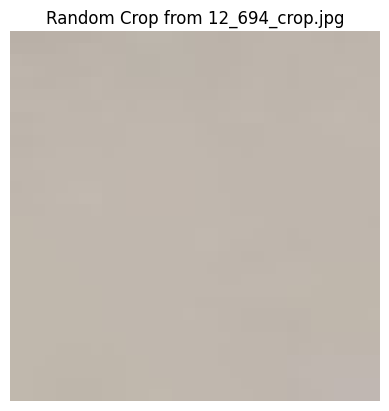

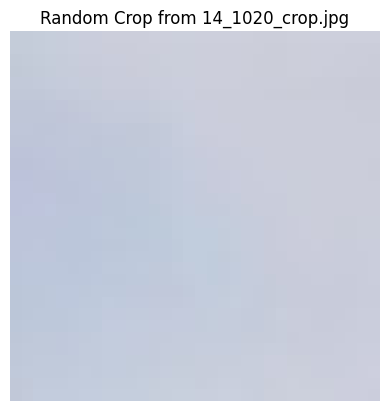

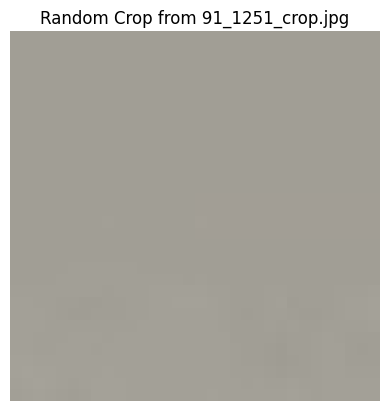

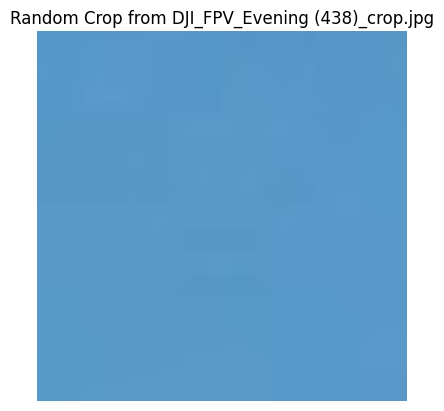

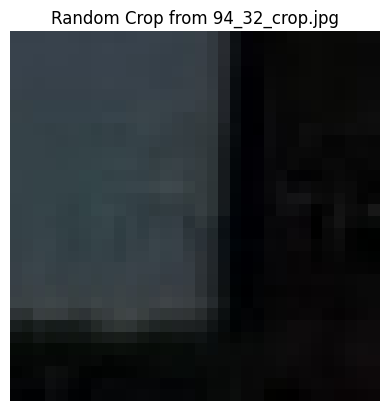

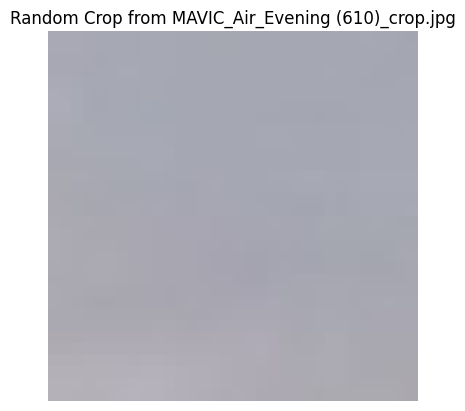

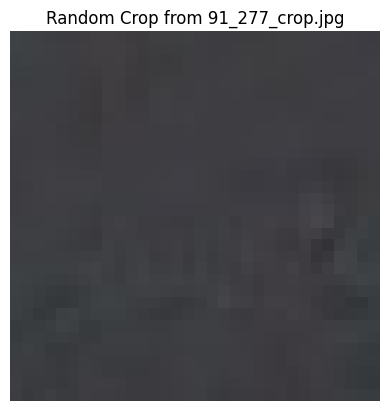

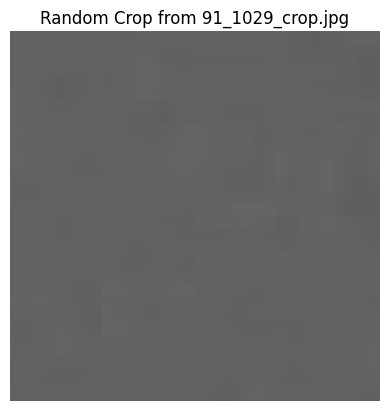

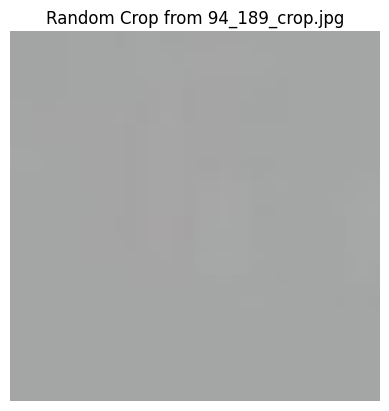

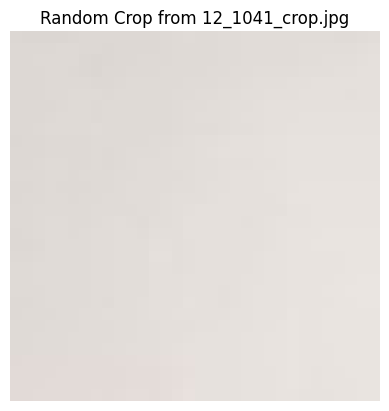

In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def random_crop_and_save(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Process all image files in the input folder
    for file_name in os.listdir(input_folder):
        # Check if the file is a .jpg image
        if file_name.lower().endswith('.jpg'):
            # Construct the full path for the image
            image_path = os.path.join(input_folder, file_name)

            # Read the image
            image = cv2.imread(image_path)

            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read the image {image_path}.")
                continue

            # Get image dimensions
            img_height, img_width, _ = image.shape

            # Generate random coordinates for cropping
            x1 = np.random.randint(0, img_width - 32)
            y1 = np.random.randint(0, img_height - 32)
            x2 = x1 + 32
            y2 = y1 + 32

            # Crop the image
            cropped_image = image[y1:y2, x1:x2]

            # Check if the cropped image is valid
            if cropped_image.size == 0:
                print(f"Error: Unable to crop the image {image_path}.")
                continue

            # Save the cropped image to the output folder
            output_image_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop.jpg')
            cv2.imwrite(output_image_path, cropped_image)

# Process images in drone_data and save in /content/drive/MyDrive/other_data_crop
random_crop_and_save('/content/drive/MyDrive/drone_data', '/content/drive/MyDrive/other_data_crop')

# Process images in bird_data and save in /content/drive/MyDrive/other_data_crop
random_crop_and_save('/content/drive/MyDrive/bird_data', '/content/drive/MyDrive/other_data_crop')

# Function to print 10 random images from the specified folder
def print_random_images(folder_path, num_images=10):
    # Get a list of all image files in the folder
    image_files = [file_name for file_name in os.listdir(folder_path) if file_name.lower().endswith('.jpg')]

    # Choose 10 random images
    random_images = random.sample(image_files, min(num_images, len(image_files)))

    # Display the random images
    for image_name in random_images:
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f'Random Crop from {image_name}')
            plt.show()

# Print 10 random images from /content/drive/MyDrive/other_data_crop
print_random_images('/content/drive/MyDrive/other_data_crop', num_images=10)


Great, write the same code. Only this time take the pictures from the /content/drive/MyDrive/bird_data folder
Cut the pictures according to the label. Note that there can be more than one line in the label, in this case cut a new image and go to a line in the label.
Save the file as 32 x 32.
Save all images and their labels at:
/content/drive/MyDrive/bird_data_crop

Do this for all images in the bird_data folder.

At the end of the process, print the bird_data_crop folder
10 random pictures.

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def process_bird_images_with_labels(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Process all image files in the input folder
    for file_name in os.listdir(input_folder):
        # Check if the file is a .jpg image
        if file_name.lower().endswith('.jpg'):
            # Construct the full path for the image
            image_path = os.path.join(input_folder, file_name)

            # Read the image
            image = cv2.imread(image_path)

            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read the image {image_path}.")
                continue

            # Construct the full path for the label file
            label_path = os.path.join(input_folder, os.path.splitext(file_name)[0] + '.txt')

            # Read the YOLO format label
            with open(label_path, 'r') as file:
                lines = file.readlines()

            # Process each line in the label file
            for line_num, line in enumerate(lines):
                label_data = line.strip().split()

                # Extract YOLO format coordinates
                if len(label_data) != 5:
                    print(f"Error: Invalid format in label file {label_path}. Expected 5 values in line {line_num + 1}.")
                    continue

                class_id, x_center, y_center, width, height = map(float, label_data)

                # Get image dimensions
                img_height, img_width, _ = image.shape

                # Convert normalized coordinates to pixel values
                x_center_pixel = int(x_center * img_width)
                y_center_pixel = int(y_center * img_height)
                width_pixel = int(width * img_width)
                height_pixel = int(height * img_height)

                # Calculate bounding box coordinates
                x1 = max(0, x_center_pixel - width_pixel // 2)
                y1 = max(0, y_center_pixel - height_pixel // 2)
                x2 = min(img_width, x_center_pixel + width_pixel // 2)
                y2 = min(img_height, y_center_pixel + height_pixel // 2)

                # Crop the image
                cropped_image = image[y1:y2, x1:x2]

                # Check if the cropped image is valid
                if cropped_image.size == 0:
                    print(f"Error: Unable to crop the image {image_path} according to the label in line {line_num + 1}.")
                    continue

                # Save the cropped image to the output folder
                output_image_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop_{line_num}.jpg')
                cv2.imwrite(output_image_path, cv2.resize(cropped_image, (32, 32)))

                # Save the label file to the output folder
                output_label_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop_{line_num}.txt')
                with open(output_label_path, 'w') as label_file:
                    label_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

    print(f"Images and labels are saved in the folder {output_folder}.")

# Process bird_data images with labels and save in /content/drive/MyDrive/bird_data_crop
process_bird_images_with_labels('/content/drive/MyDrive/bird_data', '/content/drive/MyDrive/bird_data_crop')

# Function to print 10 random images from the specified folder
def print_random_images(folder_path, num_images=10):
    # Get a list of all image files in the folder
    image_files = [file_name for file_name in os.listdir(folder_path) if file_name.lower().endswith('.jpg')]

    # Choose 10 random images
    random_images = random.sample(image_files, min(num_images, len(image_files)))

    # Display the random images
    for image_name in random_images:
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f'Random Crop from {image_name}')
            plt.show()

# Print 10 random images from /content/drive/MyDrive/bird_data_crop
print_random_images('/content/drive/MyDrive/bird_data_crop', num_images=10)


Images and labels are saved in the folder /content/drive/MyDrive/drone_data_crop.


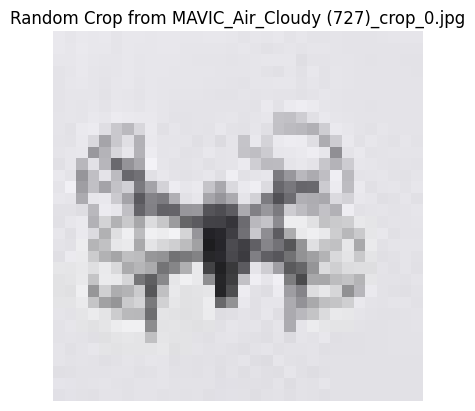

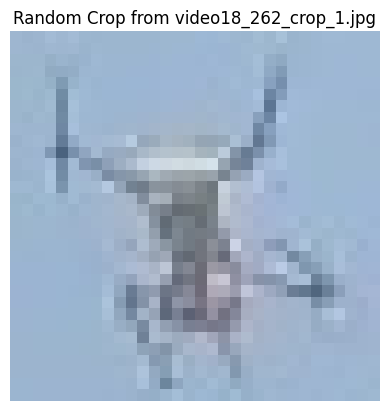

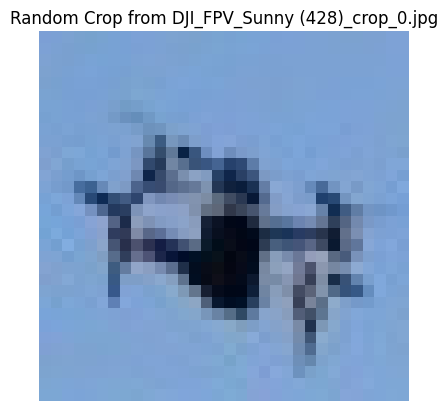

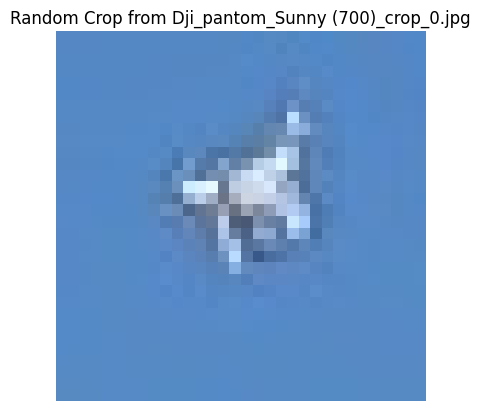

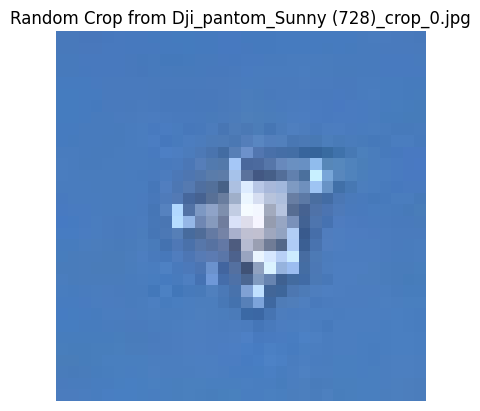

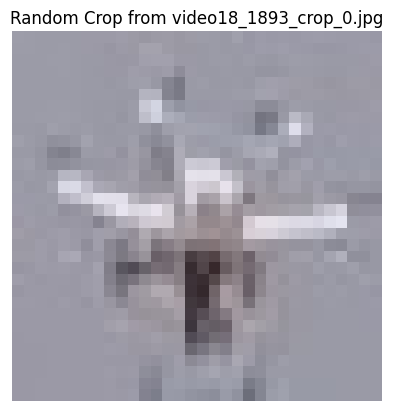

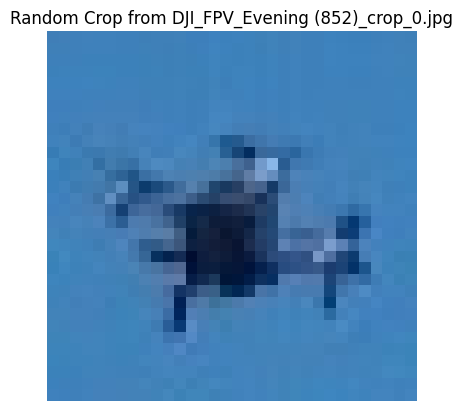

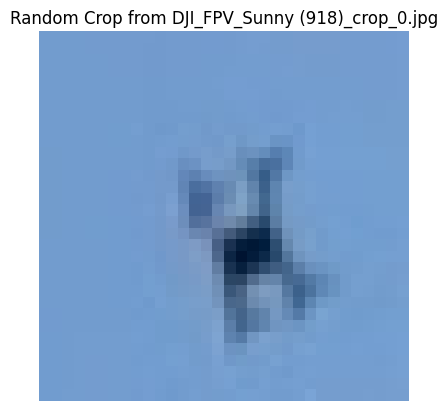

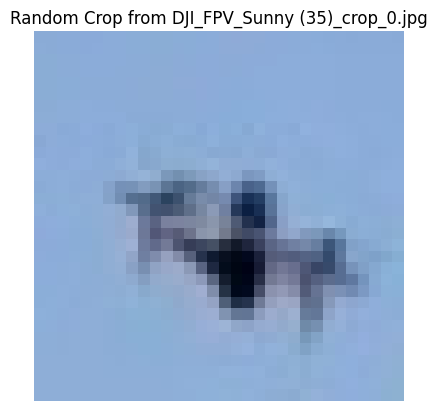

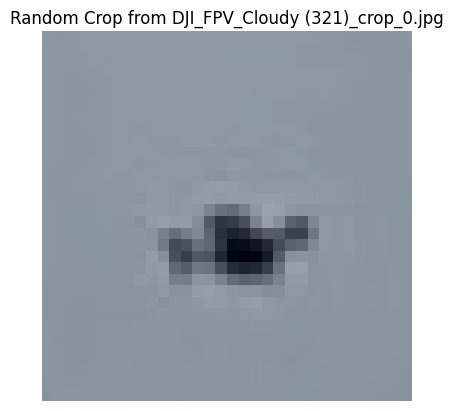

In [43]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def process_drone_images_with_labels(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Process all image files in the input folder
    for file_name in os.listdir(input_folder):
        # Check if the file is a .jpg image
        if file_name.lower().endswith('.jpg'):
            # Construct the full path for the image
            image_path = os.path.join(input_folder, file_name)

            # Read the image
            image = cv2.imread(image_path)

            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read the image {image_path}.")
                continue

            # Construct the full path for the label file
            label_path = os.path.join(input_folder, os.path.splitext(file_name)[0] + '.txt')

            # Read the YOLO format label
            with open(label_path, 'r') as file:
                lines = file.readlines()

            # Process each line in the label file
            for line_num, line in enumerate(lines):
                label_data = line.strip().split()

                # Extract YOLO format coordinates
                if len(label_data) != 5:
                    print(f"Error: Invalid format in label file {label_path}. Expected 5 values in line {line_num + 1}.")
                    continue

                class_id, x_center, y_center, width, height = map(float, label_data)

                # Get image dimensions
                img_height, img_width, _ = image.shape

                # Convert normalized coordinates to pixel values
                x_center_pixel = int(x_center * img_width)
                y_center_pixel = int(y_center * img_height)
                width_pixel = int(width * img_width)
                height_pixel = int(height * img_height)

                # Calculate bounding box coordinates
                x1 = max(0, x_center_pixel - width_pixel // 2)
                y1 = max(0, y_center_pixel - height_pixel // 2)
                x2 = min(img_width, x_center_pixel + width_pixel // 2)
                y2 = min(img_height, y_center_pixel + height_pixel // 2)

                # Crop the image
                cropped_image = image[y1:y2, x1:x2]

                # Check if the cropped image is valid
                if cropped_image.size == 0:
                    print(f"Error: Unable to crop the image {image_path} according to the label in line {line_num + 1}.")
                    continue

                # Save the cropped image to the output folder
                output_image_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop_{line_num}.jpg')
                cv2.imwrite(output_image_path, cv2.resize(cropped_image, (32, 32)))

                # Save the label file to the output folder
                output_label_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_crop_{line_num}.txt')
                with open(output_label_path, 'w') as label_file:
                    label_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

    print(f"Images and labels are saved in the folder {output_folder}.")

# Process drone_data images with labels and save in /content/drive/MyDrive/drone_data_crop
process_drone_images_with_labels('/content/drive/MyDrive/drone_data', '/content/drive/MyDrive/drone_data_crop')

# Function to print 10 random images from the specified folder
def print_random_images(folder_path, num_images=10):
    # Get a list of all image files in the folder
    image_files = [file_name for file_name in os.listdir(folder_path) if file_name.lower().endswith('.jpg')]

    # Choose 10 random images
    random_images = random.sample(image_files, min(num_images, len(image_files)))

    # Display the random images
    for image_name in random_images:
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f'Random Crop from {image_name}')
            plt.show()

# Print 10 random images from /content/drive/MyDrive/drone_data_crop
print_random_images('/content/drive/MyDrive/drone_data_crop', num_images=10)


Excellent. Now on the drone_data_crop file Apply augmentations like random flip, color jitter, and rotation.
and save in a folder.
Show 10 examples of augmentations.
You can randomly choose the type of augmentation.
Do this for half of the images in the folder.

Augmented images are saved in the folder /content/drive/MyDrive/drone_data_crop.


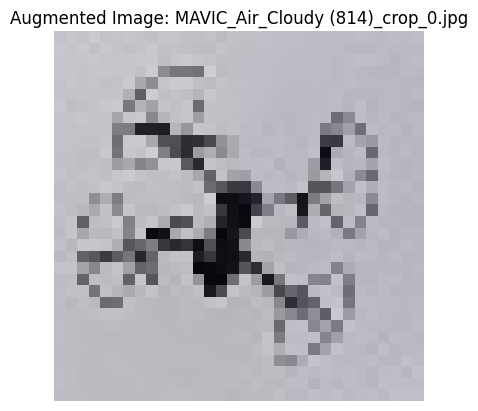

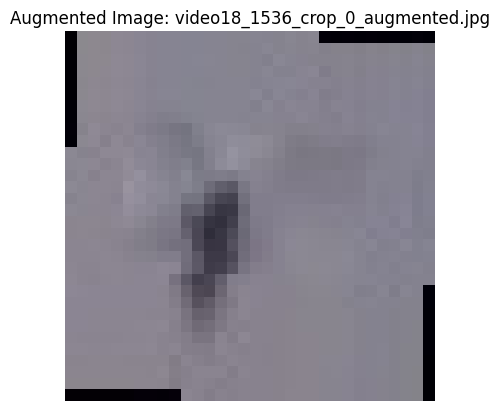

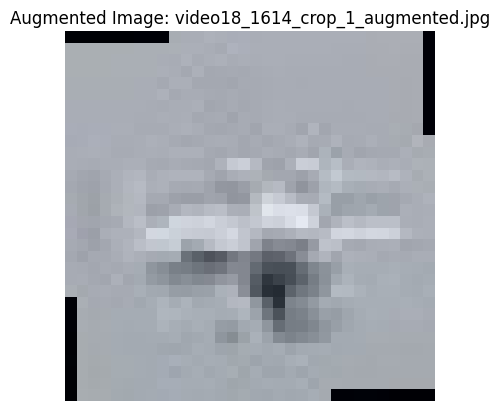

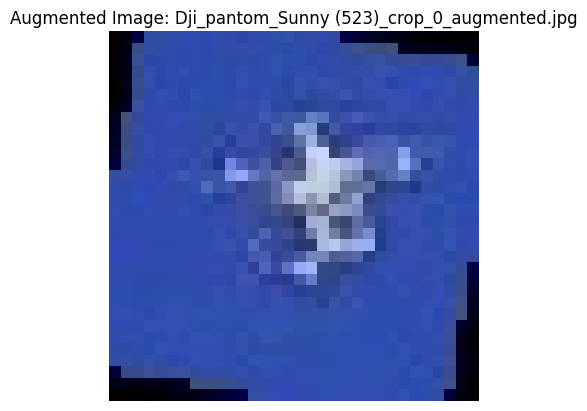

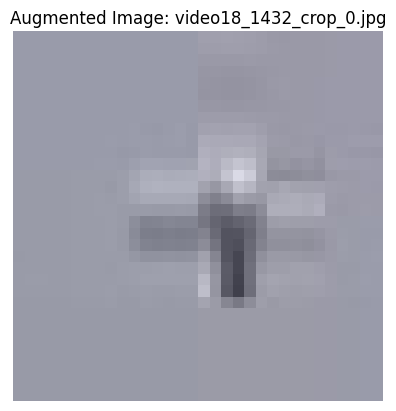

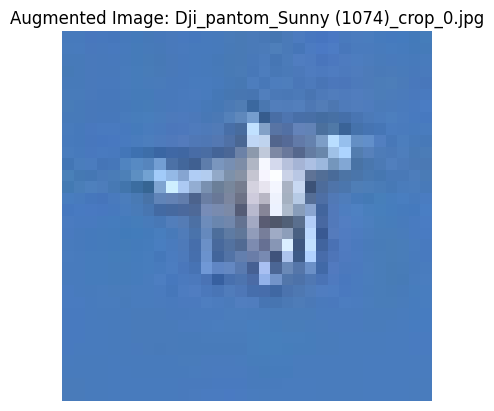

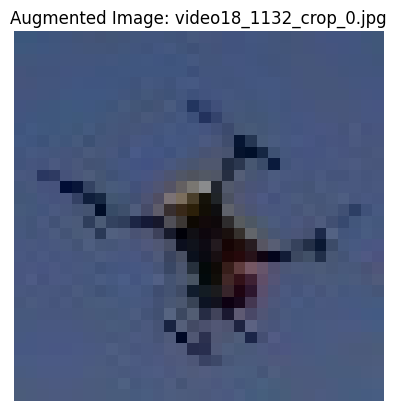

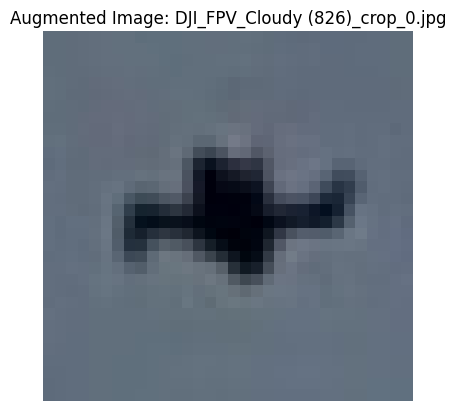

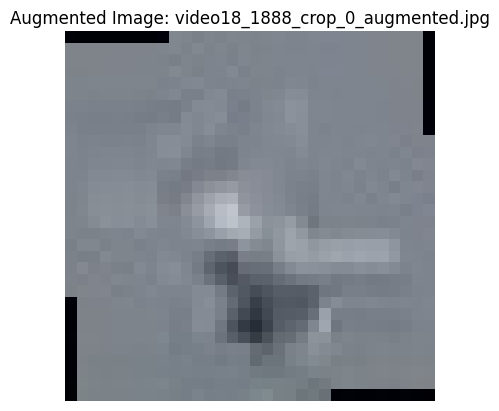

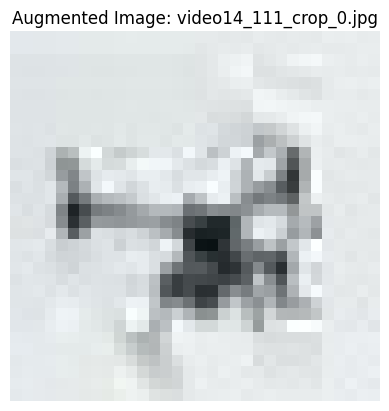

In [46]:
import os
import cv2
import random
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

def apply_augmentations(input_folder, num_samples=10):
    # Get a list of all image files in the input folder
    image_files = [file_name for file_name in os.listdir(input_folder) if file_name.lower().endswith('.jpg')]

    # Randomly choose half of the images
    selected_images = random.sample(image_files, len(image_files) // 2)

    # Transformation pipeline for augmentations
    transformations = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomRotation(degrees=(-15, 15)),
    ])

    # Apply augmentations to selected images
    for image_name in selected_images:
        # Read the image
        image_path = os.path.join(input_folder, image_name)
        image = cv2.imread(image_path)

        # Convert image to PIL Image
        pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Apply augmentations
        augmented_image = transformations(pil_image)

        # Convert augmented image back to NumPy array
        augmented_image = cv2.cvtColor(np.array(augmented_image), cv2.COLOR_RGB2BGR)

        # Save the augmented image back to the input folder
        output_image_path = os.path.join(input_folder, f'{os.path.splitext(image_name)[0]}_augmented.jpg')
        cv2.imwrite(output_image_path, augmented_image)

    print(f"Augmented images are saved in the folder {input_folder}.")

# Apply augmentations to half of the images in drone_data_crop folder
apply_augmentations('/content/drive/MyDrive/drone_data_crop', num_samples=10)

# Function to display 10 randomly chosen augmented images
def display_augmented_images(folder_path, num_samples=10):
    # Get a list of all image files in the folder
    image_files = [file_name for file_name in os.listdir(folder_path) if file_name.lower().endswith('.jpg')]

    # Randomly choose 10 images
    selected_images = random.sample(image_files, min(num_samples, len(image_files)))

    # Display the augmented images
    for image_name in selected_images:
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f'Augmented Image: {image_name}')
            plt.show()

# Display 10 randomly chosen augmented images from /content/drive/MyDrive/drone_data_crop
display_augmented_images('/content/drive/MyDrive/drone_data_crop', num_samples=10)


Excellent. Now on the **bird_data_crop** file Apply augmentations like random flip, color jitter, and rotation.
and save in a folder.
Show 10 examples of vagmentation.
You can randomly choose the type of augmentation.
Do this for half of the images in the folder.

Augmented images are saved in the folder /content/drive/MyDrive/bird_data_crop.


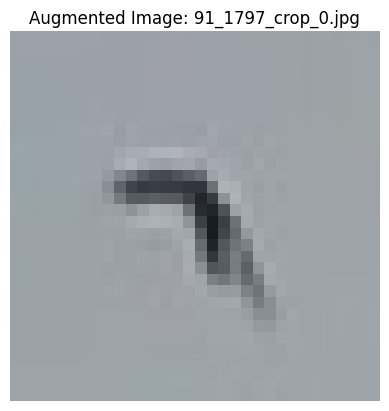

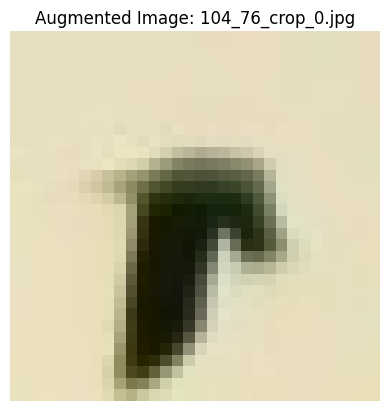

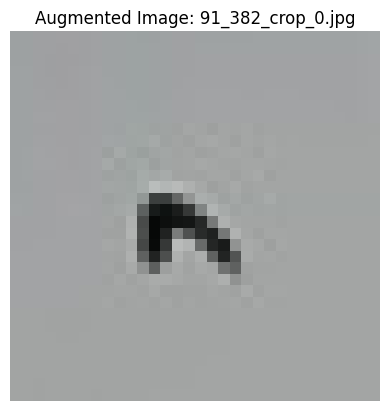

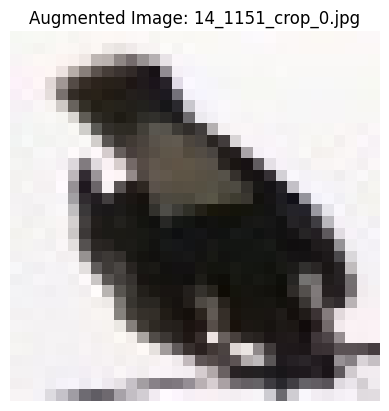

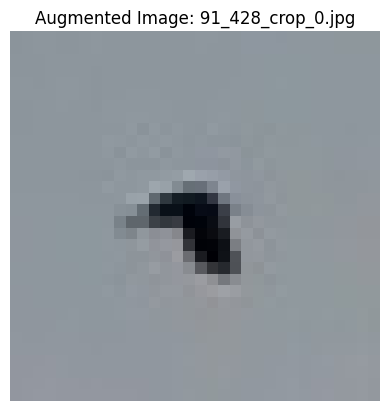

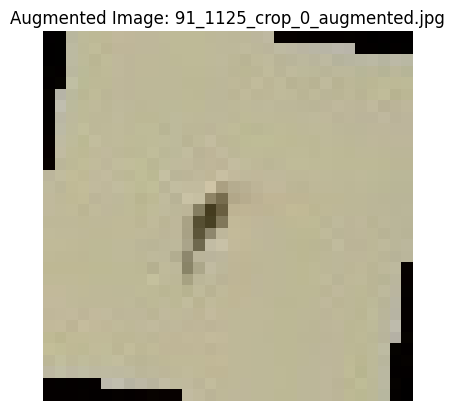

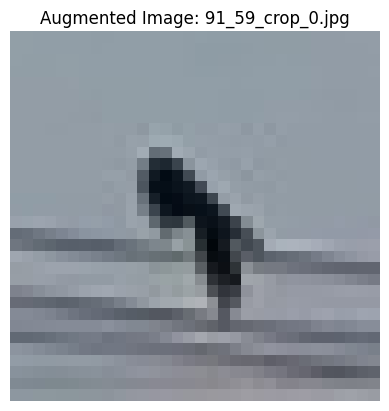

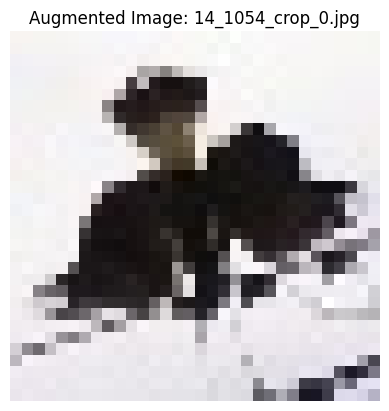

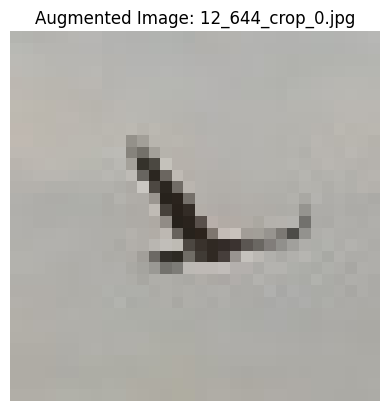

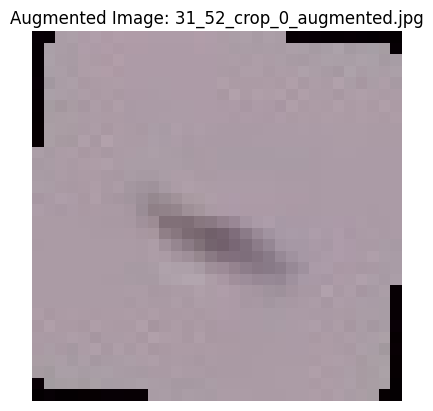

In [48]:
import os
import cv2
import random
import numpy as np
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

def apply_augmentations(input_folder, num_samples=10):
    # Get a list of all image files in the input folder
    image_files = [file_name for file_name in os.listdir(input_folder) if file_name.lower().endswith('.jpg')]

    # Randomly choose half of the images
    selected_images = random.sample(image_files, len(image_files) // 2)

    # Transformation pipeline for augmentations
    transformations = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomRotation(degrees=(-15, 15)),
    ])

    # Apply augmentations to selected images
    for image_name in selected_images:
        # Read the image
        image_path = os.path.join(input_folder, image_name)
        image = cv2.imread(image_path)

        # Convert image to PIL Image
        pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Apply augmentations
        augmented_image = transformations(pil_image)

        # Convert augmented image back to NumPy array
        augmented_image = cv2.cvtColor(np.array(augmented_image), cv2.COLOR_RGB2BGR)

        # Save the augmented image back to the input folder
        output_image_path = os.path.join(input_folder, f'{os.path.splitext(image_name)[0]}_augmented.jpg')
        cv2.imwrite(output_image_path, augmented_image)

    print(f"Augmented images are saved in the folder {input_folder}.")

# Apply augmentations to half of the images in bird_data_crop folder
apply_augmentations('/content/drive/MyDrive/bird_data_crop', num_samples=10)

# Function to display 10 randomly chosen augmented images
def display_augmented_images(folder_path, num_samples=10):
    # Get a list of all image files in the folder
    image_files = [file_name for file_name in os.listdir(folder_path) if file_name.lower().endswith('.jpg')]

    # Randomly choose 10 images
    selected_images = random.sample(image_files, min(num_samples, len(image_files)))

    # Display the augmented images
    for image_name in selected_images:
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f'Augmented Image: {image_name}')
            plt.show()

# Display 10 randomly chosen augmented images from /content/drive/MyDrive/bird_data_crop
display_augmented_images('/content/drive/MyDrive/bird_data_crop', num_samples=10)


Excellent. Now on the file of **other_data_crop** Apply augmentations like random flip, color jitter, and rotation.
and save in a folder.
Show 10 examples of vagmentation.
You can randomly choose the type of augmentation.
Do this for half of the images in the folder.
Save the new images in the same folder.

Augmented images are saved in the folder /content/drive/MyDrive/other_data_crop.


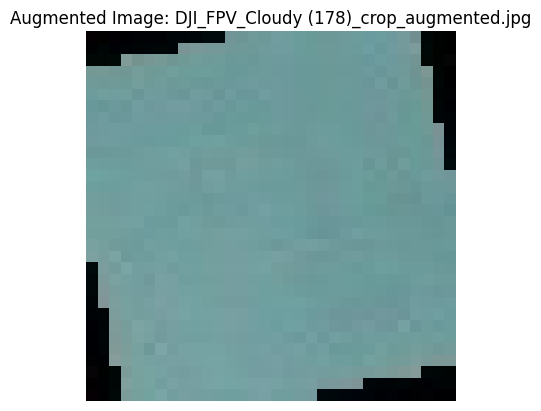

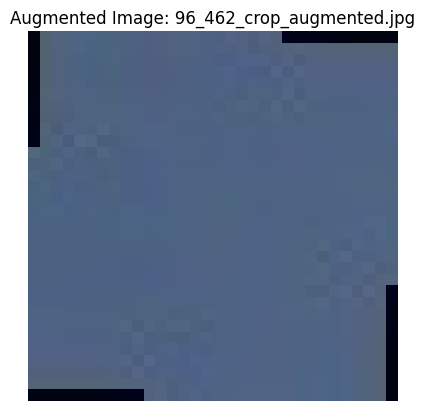

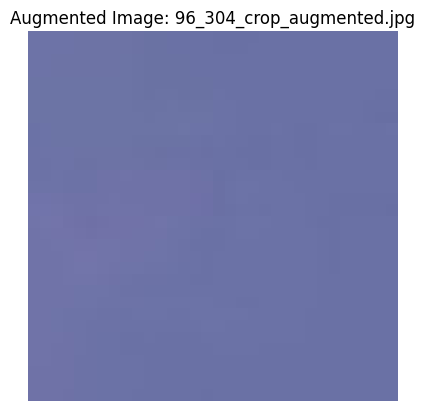

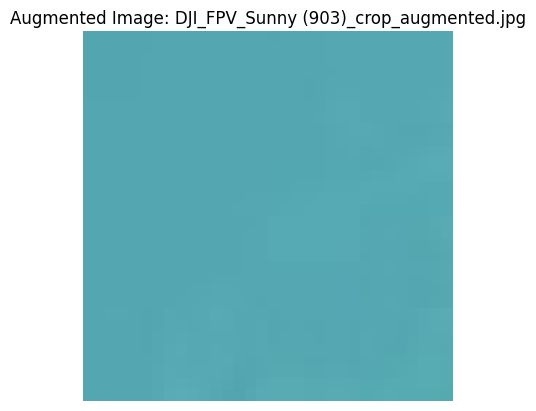

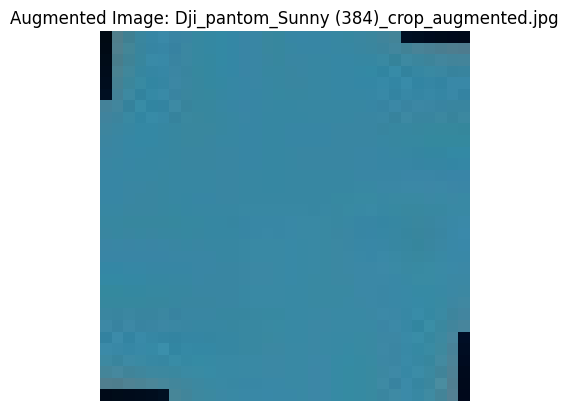

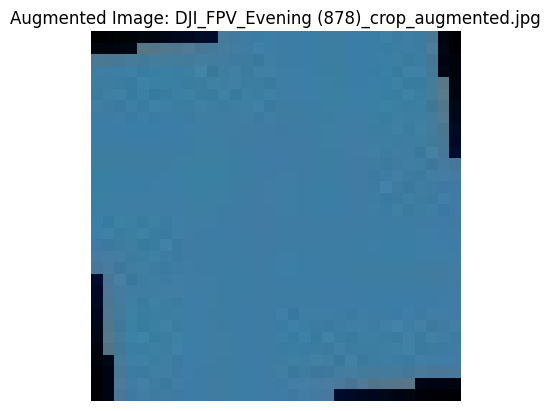

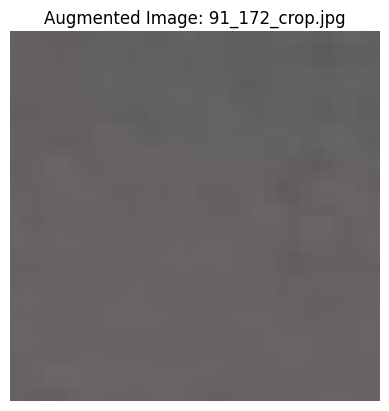

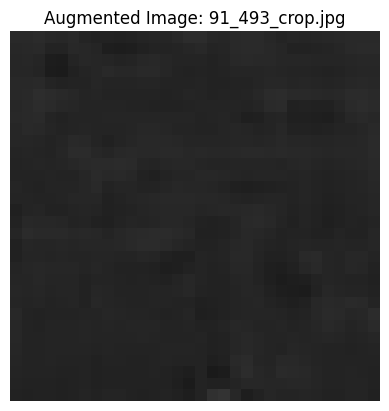

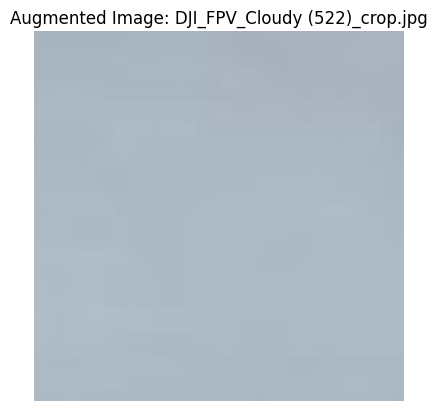

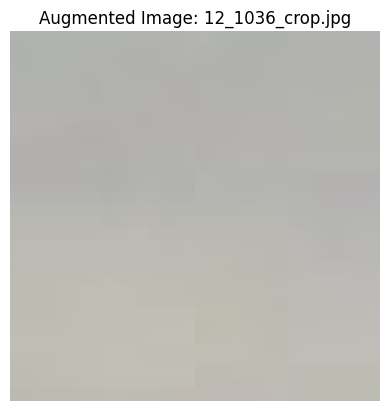

In [49]:
import os
import cv2
import random
import numpy as np
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

def apply_augmentations(input_folder, num_samples=10):
    # Get a list of all image files in the input folder
    image_files = [file_name for file_name in os.listdir(input_folder) if file_name.lower().endswith('.jpg')]

    # Randomly choose half of the images
    selected_images = random.sample(image_files, len(image_files) // 2)

    # Transformation pipeline for augmentations
    transformations = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomRotation(degrees=(-15, 15)),
    ])

    # Apply augmentations to selected images
    for image_name in selected_images:
        # Read the image
        image_path = os.path.join(input_folder, image_name)
        image = cv2.imread(image_path)

        # Convert image to PIL Image
        pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Apply augmentations
        augmented_image = transformations(pil_image)

        # Convert augmented image back to NumPy array
        augmented_image = cv2.cvtColor(np.array(augmented_image), cv2.COLOR_RGB2BGR)

        # Save the augmented image back to the input folder
        output_image_path = os.path.join(input_folder, f'{os.path.splitext(image_name)[0]}_augmented.jpg')
        cv2.imwrite(output_image_path, augmented_image)

    print(f"Augmented images are saved in the folder {input_folder}.")

# Apply augmentations to half of the images in other_data_crop folder
apply_augmentations('/content/drive/MyDrive/other_data_crop', num_samples=10)

# Function to display 10 randomly chosen augmented images
def display_augmented_images(folder_path, num_samples=10):
    # Get a list of all image files in the folder
    image_files = [file_name for file_name in os.listdir(folder_path) if file_name.lower().endswith('.jpg')]

    # Randomly choose 10 images
    selected_images = random.sample(image_files, min(num_samples, len(image_files)))

    # Display the augmented images
    for image_name in selected_images:
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f'Augmented Image: {image_name}')
            plt.show()

# Display 10 randomly chosen augmented images from /content/drive/MyDrive/other_data_crop
display_augmented_images('/content/drive/MyDrive/other_data_crop', num_samples=10)


## **Plot sample images from each class.**

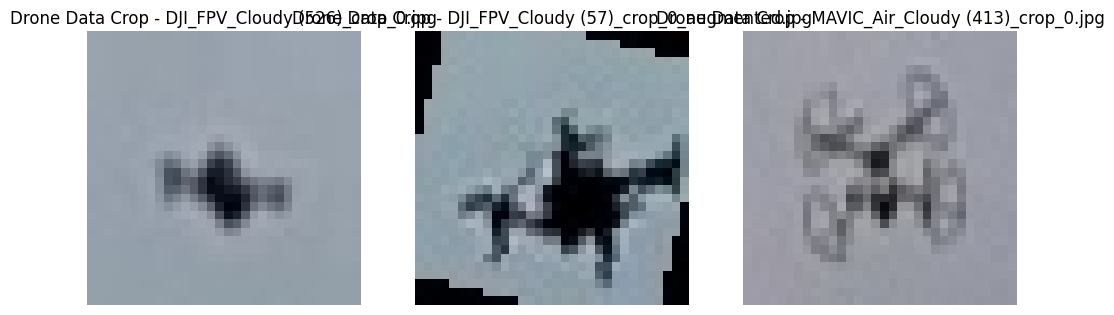

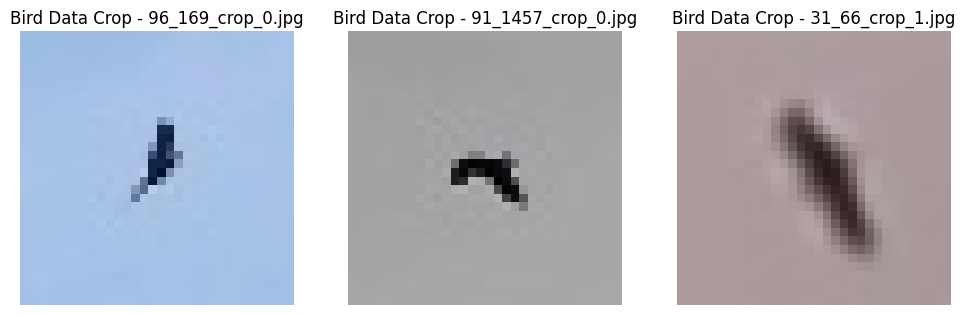

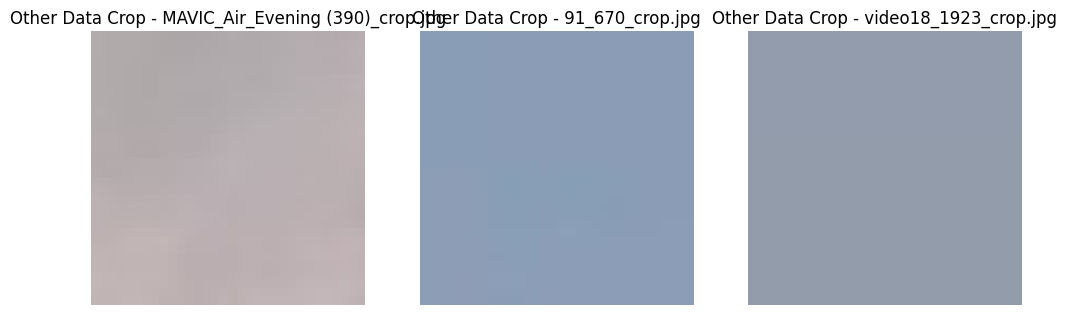

In [50]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def plot_sample_images(folder_path, class_name, num_samples=3):
    # Get a list of all image files in the folder
    image_files = [file_name for file_name in os.listdir(folder_path) if file_name.lower().endswith('.jpg')]

    # Randomly choose samples
    selected_images = random.sample(image_files, min(num_samples, len(image_files)))

    # Plot the sample images
    plt.figure(figsize=(12, 4))
    for i, image_name in enumerate(selected_images, 1):
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_samples, i)
        plt.imshow(image)
        plt.title(f'{class_name} - {image_name}')
        plt.axis('off')

    plt.show()

# Plot sample images from each class
plot_sample_images('/content/drive/MyDrive/drone_data_crop', 'Drone Data Crop')
plot_sample_images('/content/drive/MyDrive/bird_data_crop', 'Bird Data Crop')
plot_sample_images('/content/drive/MyDrive/other_data_crop', 'Other Data Crop')


### **CNN Classifier Model:**

Epoch 1/10
646/646 [==============================] - 31s 46ms/step - loss: 0.3170 - accuracy: 0.8822
Epoch 2/10
646/646 [==============================] - 33s 51ms/step - loss: 0.1747 - accuracy: 0.9415
Epoch 3/10
646/646 [==============================] - 30s 46ms/step - loss: 0.1352 - accuracy: 0.9550
Epoch 4/10
646/646 [==============================] - 28s 43ms/step - loss: 0.1078 - accuracy: 0.9648
Epoch 5/10
646/646 [==============================] - 31s 47ms/step - loss: 0.0865 - accuracy: 0.9721
Epoch 6/10
646/646 [==============================] - 29s 45ms/step - loss: 0.0712 - accuracy: 0.9785
Epoch 7/10
646/646 [==============================] - 32s 50ms/step - loss: 0.0634 - accuracy: 0.9798
Epoch 8/10
646/646 [==============================] - 27s 42ms/step - loss: 0.0550 - accuracy: 0.9827
Epoch 9/10
646/646 [==============================] - 29s 45ms/step - loss: 0.0449 - accuracy: 0.9856
Epoch 10/10
162/162 [==============================] - 2s 12ms/step - loss: 0.0726

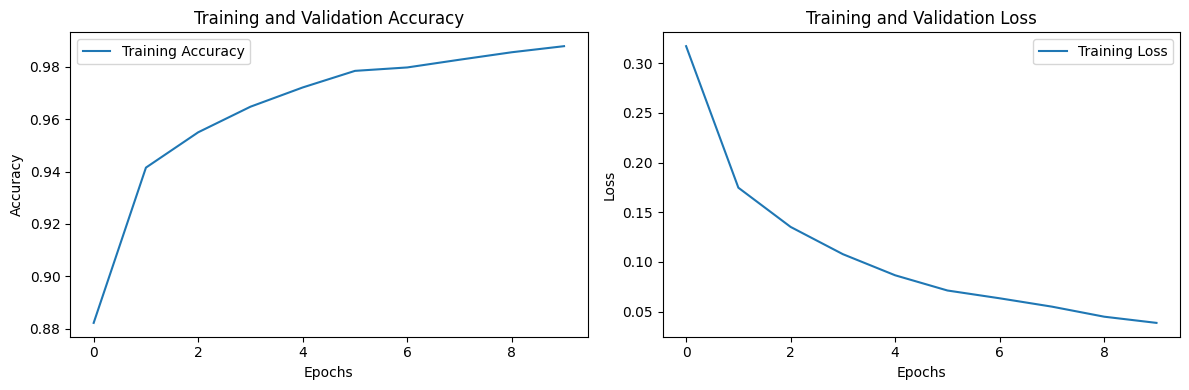

162/162 [==============================] - 2s 12ms/step - loss: 0.0726 - accuracy: 0.9814

Test Accuracy: 98.14%
162/162 [==============================] - 2s 12ms/step


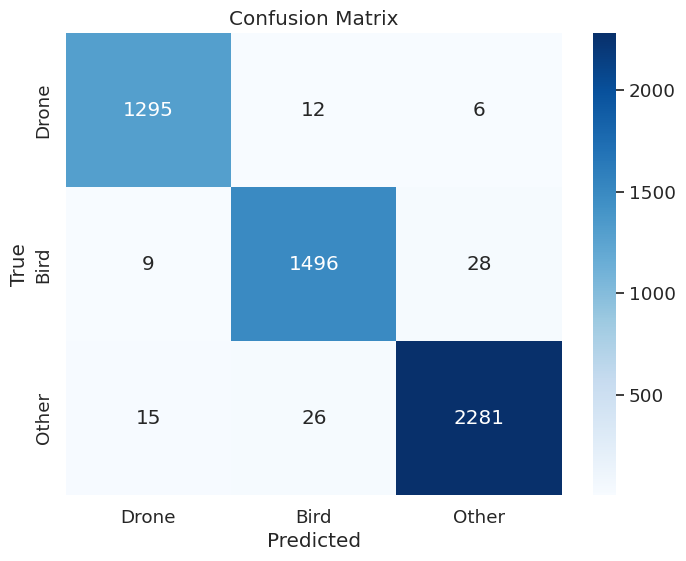

In [59]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix



def load_and_preprocess_image(image_path, target_size=(32, 32)):
    # Load image and resize
    img = load_img(image_path, target_size=target_size)
    # Convert image to NumPy array
    img_array = img_to_array(img)
    # Normalize pixel values to between 0 and 1
    img_array /= 255.0
    return img_array

def load_images_and_labels(folder_path, label):
    image_files = [file_name for file_name in os.listdir(folder_path) if file_name.lower().endswith('.jpg')]
    images = [load_and_preprocess_image(os.path.join(folder_path, image_file)) for image_file in image_files]
    labels = [label] * len(images)
    return images, labels

# Load and preprocess images for each class
drone_images, drone_labels = load_images_and_labels('/content/drive/MyDrive/drone_data_crop', 0)
bird_images, bird_labels = load_images_and_labels('/content/drive/MyDrive/bird_data_crop', 1)
other_images, other_labels = load_images_and_labels('/content/drive/MyDrive/other_data_crop', 2)

# Combine data from different classes
all_images = np.concatenate([drone_images, bird_images, other_images], axis=0)
all_labels = np.concatenate([drone_labels, bird_labels, other_labels], axis=0)

# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42)

# Convert data to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(1000).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)

# Build a simple CNN classifier
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Output layer with 3 perceptrons (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(train_dataset, epochs=10)

# Evaluate performance on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
elif 'val_acc' in history.history:
    plt.plot(history.history['val_acc'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate performance on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')

# Predictions and Confusion Matrix
predictions = np.argmax(model.predict(test_images), axis=1)
conf_mat = confusion_matrix(test_labels, predictions)

# Plot Confusion Matrix
class_names = ['Drone', 'Bird', 'Other']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Plot accuracy and loss graphs
Plot a confusion matrix

# New Section